In [31]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [14]:
mnist = datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images = np.pad(train_images, ((0,0), (2,2), (2,2)), mode='constant', constant_values=0)
test_images = np.pad(test_images, ((0,0), (2,2), (2,2)), mode='constant', constant_values=0)
train_images = train_images.reshape(train_images.shape[0], 32, 32, 1).astype('float32')/255.0
test_images = test_images.reshape(test_images.shape[0], 32, 32, 1).astype('float32')/255.0

In [33]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
train_images.shape

(60000, 32, 32, 1)

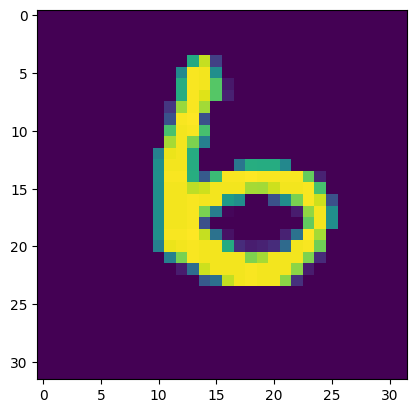

In [17]:
plt.figure()
plt.imshow(train_images[8004])
plt.show()

In [40]:
# le net architecture
model_lenet = models.Sequential()
#C1
model_lenet.add(layers.Conv2D(6, (5, 5), input_shape=(32, 32, 1), activation='relu'))
#S2
model_lenet.add(layers.AveragePooling2D(pool_size = (2,2), strides = (2,2), padding='valid',data_format=None))
#C3
model_lenet.add(layers.Conv2D(16, (5, 5), padding='valid', activation='relu'))
#s4
model_lenet.add(layers.AveragePooling2D(pool_size = (2,2), strides=(2,2),padding='valid'))
model_lenet.add(layers.Flatten())

model_lenet.add(layers.Dense(120, activation='relu'))
model_lenet.add(layers.Dense(84, activation='relu'))
model_lenet.add(layers.Dense(10, activation='softmax'))

In [27]:
model_lenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [41]:
model_lenet.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [43]:
model_lenet.fit(
    train_images,
    train_labels,
    epochs = 10,
    batch_size = 64,
    validation_data = (test_images, test_labels)
)

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0950 - accuracy: 0.9711 - val_loss: 0.0592 - val_accuracy: 0.9797
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0653 - accuracy: 0.9798 - val_loss: 0.0513 - val_accuracy: 0.9831
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0380 - val_accuracy: 0.9870
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0354 - accuracy: 0.9885 - val_loss: 0.0494 - val_accuracy: 0.9843
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0337 - val_accuracy: 0.9892
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0388 - val_accuracy: 0.9888
Epoch 

In [44]:
test_loss, test_acc = model_lenet.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0324 - accuracy: 0.9890 - 948ms/epoch - 3ms/step
0.9890000224113464
